### **Import library yang digunakan**

In [ ]:
import re
import nltk
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
import tensorflow as tf
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Reading data**

In [ ]:
data = pd.read_csv("/content/text.csv")
data.drop(columns="Unnamed: 0", inplace=True)
data.head()

,text,label
0,i just feel really helpless and heavy hearted,4.0
1,ive enjoyed being able to slouch about relax a...,0.0
2,i gave up my internship with the dmrg and am f...,4.0
3,i dont know i feel so lost,0.0
4,i am a kindergarten teacher and i am thoroughl...,4.0


### **Data reading**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311560 entries, 0 to 311559
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   text    311560 non-null  object 
 1   label   311559 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.8+ MB


### **Label classification**

In [ ]:
data['label'] = data['label'].replace('suppride', 'surprise')
emotion = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "suppride"
}
data["label"] = data["label"].map(emotion)

### **Preprocessing**

In [ ]:
data.duplicated().sum()

401

In [ ]:
data_dupe = data[data.duplicated()]
print("data duplikat: ")
data_dupe

data duplikat: 


,text,label
8397,i told my staff i said you know i feel invigor...,joy
15187,i feel fine,joy
15638,i feel bob loblaw is a handsome professional m...,joy
19413,i feel tortured var fb comment action link hre...,anger
23711,i also have no particular feeling of patriotis...,love
...,...,...
310301,im feeling mellow hours ago,joy
310927,i feel lovely,love
310962,im not feeling deprived at all,sadness
311088,i feel so ugly and it s depressing me,sadness


In [ ]:
data = data.drop_duplicates(keep='first')
data.shape

(311159, 2)

In [ ]:
data['label'].value_counts()

,count
label,
joy,105280
sadness,90655
anger,42653
fear,35596
love,25726
suppride,11248


In [ ]:
# Check for NaN values in the 'text' and 'label' columns
print(data.isna().sum())

text     0
label    1
dtype: int64


In [ ]:
# Drop rows with NaN values in 'text' or 'label' columns
data = data.dropna(subset=['text', 'label'])


In [ ]:
# Check for NaN values in the 'text' and 'label' columns
print(data.isna().sum())

text     0
label    0
dtype: int64


In [ ]:
# Drop rows where 'text' or 'label' is NaN
data = data.dropna(subset=['text', 'label'])

# Check if there are any missing values left
print(data.isna().sum())

text     0
label    0
dtype: int64


In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

data['text'] = data['text'].apply(remove_stopwords)
data.head()


,text,label
0,feel really helpless heavy hearted,fear
1,ive enjoyed able slouch relax unwind frankly n...,sadness
2,gave internship dmrg feeling distraught,fear
3,dont know feel lost,sadness
4,kindergarten teacher thoroughly weary job take...,fear


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in _df_2.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('label')

In [ ]:

print(len(data))


311158


In [ ]:
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: ' '.join(
    [lemmatizer.lemmatize(word) for word in word_tokenize(re.sub(r'[^\w\s]', '', x).lower()) if word]
))
data.head()


,text,label
0,feel really helpless heavy hearted,fear
1,ive enjoyed able slouch relax unwind frankly n...,sadness
2,gave internship dmrg feeling distraught,fear
3,dont know feel lost,sadness
4,kindergarten teacher thoroughly weary job take...,fear


### **Splitting data**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.25, random_state=42, stratify=data['label'])

# Display the shapes of the training and testing sets
print("\nShapes of Training and Testing Sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of Training and Testing Sets:
X_train: (233368,)
X_test: (77790,)
y_train: (233368,)
y_test: (77790,)


### **Modelling**

In [ ]:
# Simplified label mapping and data preprocessing
label_mapping = {v: k for k, v in emotion.items()}

y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_encoded)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_encoded)).batch(64)

# Create a simplified text vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=5000,
    output_mode='int',
    output_sequence_length=50
)

# Adapt the vectorization layer to the training data
vectorize_layer.adapt(X_train)

model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(len(label_mapping), activation='softmax')  # Output layer
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with fewer epochs
history = model.fit(
    train_dataset,  # Already batched in the dataset
    epochs=5,
    validation_data=test_dataset,
)

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/5
3647/3647 ━━━━━━━━━━━━━━━━━━━━ 180s 49ms/step - accuracy: 0.7606 - loss: 0.6213 - val_accuracy: 0.9316 - val_loss: 0.1260
Epoch 2/5
3647/3647 ━━━━━━━━━━━━━━━━━━━━ 176s 48ms/step - accuracy: 0.9355 - loss: 0.1157 - val_accuracy: 0.9345 - val_loss: 0.1134
Epoch 3/5
3647/3647 ━━━━━━━━━━━━━━━━━━━━ 177s 48ms/step - accuracy: 0.9403 - loss: 0.0995 - val_accuracy: 0.9331 - val_loss: 0.1100
Epoch 4/5
3647/3647 ━━━━━━━━━━━━━━━━━━━━ 177s 48ms/step - accuracy: 0.9428 - loss: 0.0926 - val_accuracy: 0.9326 - val_loss: 0.1122
Epoch 5/5
3647/3647 ━━━━━━━━━━━━━━━━━━━━ 176s 48ms/step - accuracy: 0.9455 - loss: 0.0892 - val_accuracy: 0.9309 - val_loss: 0.1119
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9313 - loss: 0.1114
Loss: 0.11191336065530777
Accuracy: 0.93092942237854


### **Saving Data**

In [ ]:
import pathlib
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

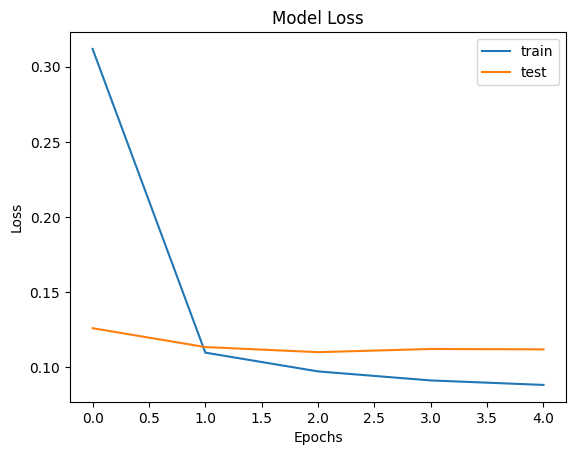

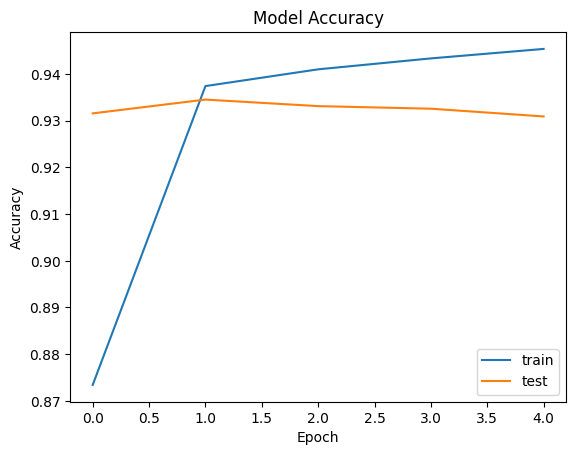

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### **Cllasification Report**

In [ ]:
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test_encoded, y_pred_classes))


1216/1216 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22664
           1       0.95      0.95      0.95     26320
           2       0.83      0.82      0.83      6432
           3       0.97      0.91      0.94     10663
           4       0.88      0.90      0.89      8899
           5       0.82      0.71      0.76      2812

    accuracy                           0.93     77790
   macro avg       0.90      0.88      0.89     77790
weighted avg       0.93      0.93      0.93     77790

